In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("./data/daily-bike-share.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:

- instant: A unique row identifier
- dteday: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- season: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
- yr: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- mnth: The calendar month in which the observation was made (1:January ... 12:December)
- holiday: A binary value indicating whether or not the observation was made on a public holiday)
- weekday: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- workingday: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- weathersit: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- temp: The temperature in celsius (normalized)
- atemp: The apparent ("feels-like") temperature in celsius (normalized)
- hum: The humidity level (normalized)
- windspeed: The windspeed (normalized)
- rentals: The number of bicycle rentals recorded

In [3]:
df.shape

(731, 14)

In [4]:
df['day'] = pd.to_datetime(df['dteday'],format='%M/%d/%Y').apply(lambda x: x.day)

In [5]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3


In [19]:
numeric_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season','mnth', 'holiday', 'weekday','workingday', 'weathersit','day']
df[numeric_features].describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


In [7]:
def plot_distribution(dataset):
    try:
        print("Field name :",dataset.name)
    except Exception as e:
        pass
    min_value = dataset.min()
    max_value = dataset.max()
    mean_value = dataset.mean()
    median_value = dataset.median()
    mode_value = dataset.mode()[0]
    
    print(f"""
    Minimum Value : {min_value} 
    Maximum Value : {max_value}
    Median        : {median_value}
    Mode Value    : {mode_value}
    Mean Value    : {mean_value}
    """)
    
    fig, ax = plt.subplots(3,1,figsize=(12,12))
    
    ax[0].hist(dataset.values)
    ax[0].set_ylabel('Frequency')

    ax[0].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)


    ax[1].boxplot(dataset,vert=False)
    ax[1].set_xlabel('Value')
    
    sns.distplot(dataset,kde=True,hist=True)
    ax[2].axvline(x=min_value, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mean_value, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=median_value, color = 'red', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=mode_value, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[2].axvline(x=max_value, color = 'gray', linestyle='dashed', linewidth = 2)
    
    fig.suptitle(dataset.name)

    plt.show()

Field name : temp

    Minimum Value : 0.0591304 
    Maximum Value : 0.861667
    Median        : 0.498333
    Mode Value    : 0.265833
    Mean Value    : 0.495384788508892
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


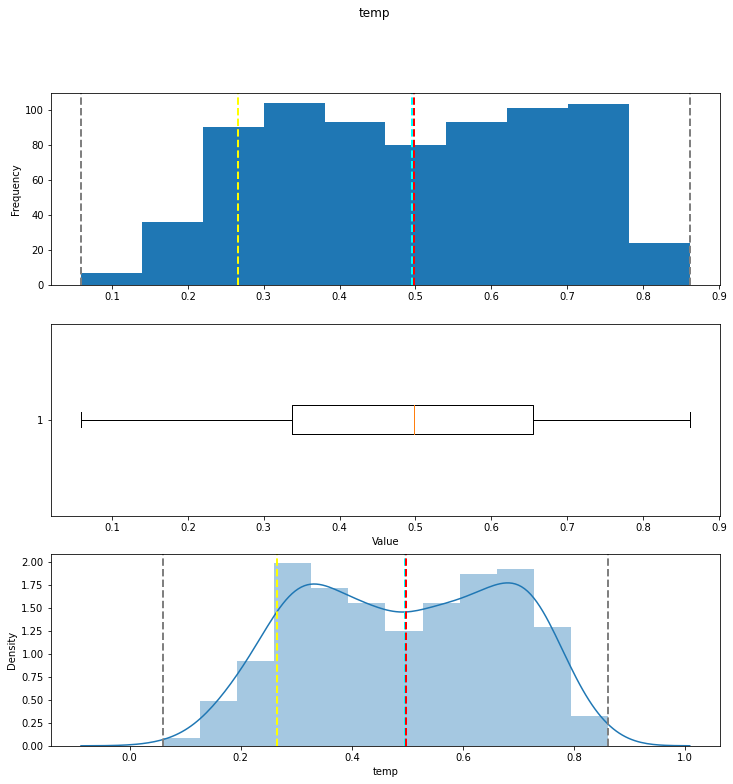

################################################################################################################
Field name : atemp

    Minimum Value : 0.0790696 
    Maximum Value : 0.840896
    Median        : 0.486733
    Mode Value    : 0.654688
    Mean Value    : 0.47435398864569084
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


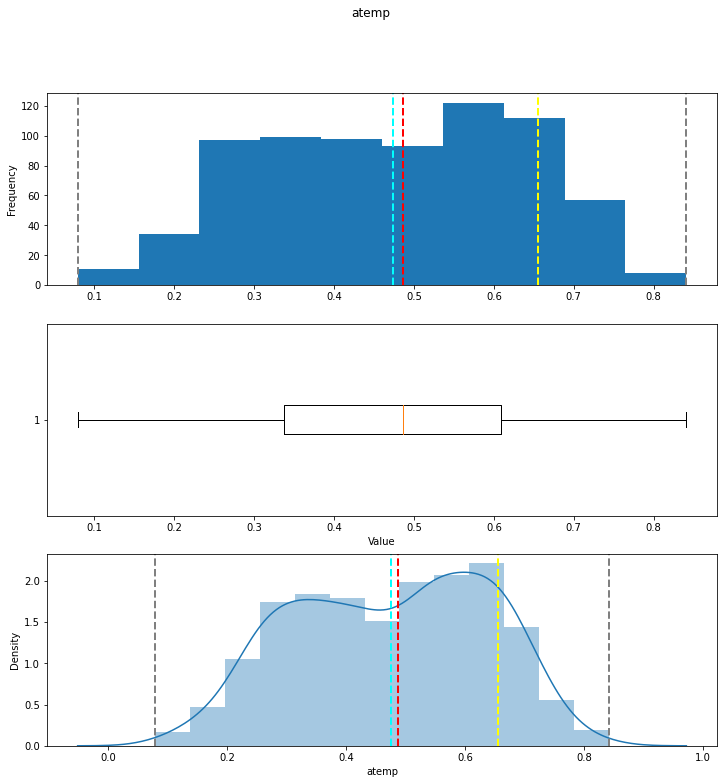

################################################################################################################
Field name : hum

    Minimum Value : 0.0 
    Maximum Value : 0.9725
    Median        : 0.626667
    Mode Value    : 0.613333
    Mean Value    : 0.6278940629274967
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


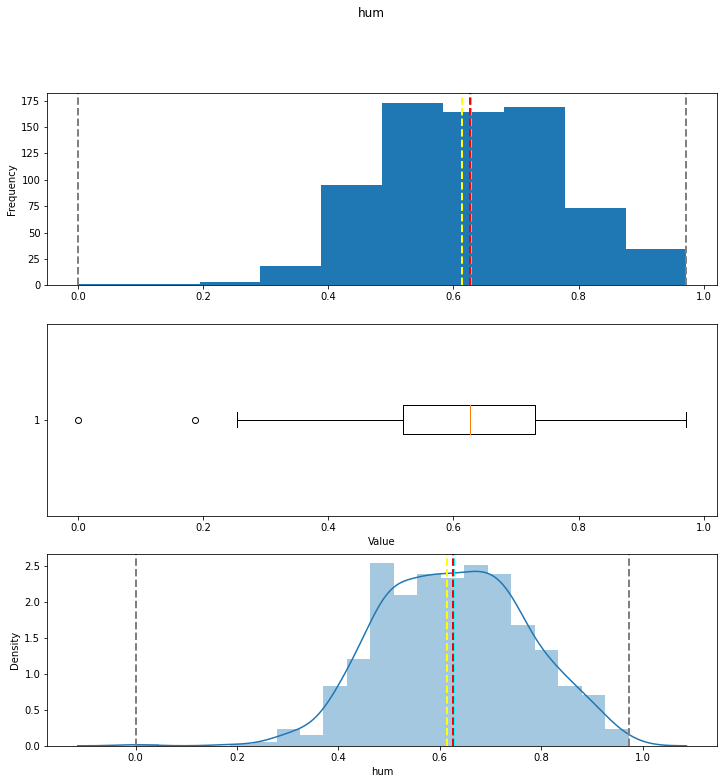

################################################################################################################
Field name : windspeed

    Minimum Value : 0.0223917 
    Maximum Value : 0.507463
    Median        : 0.180975
    Mode Value    : 0.10635
    Mean Value    : 0.190486211627907
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


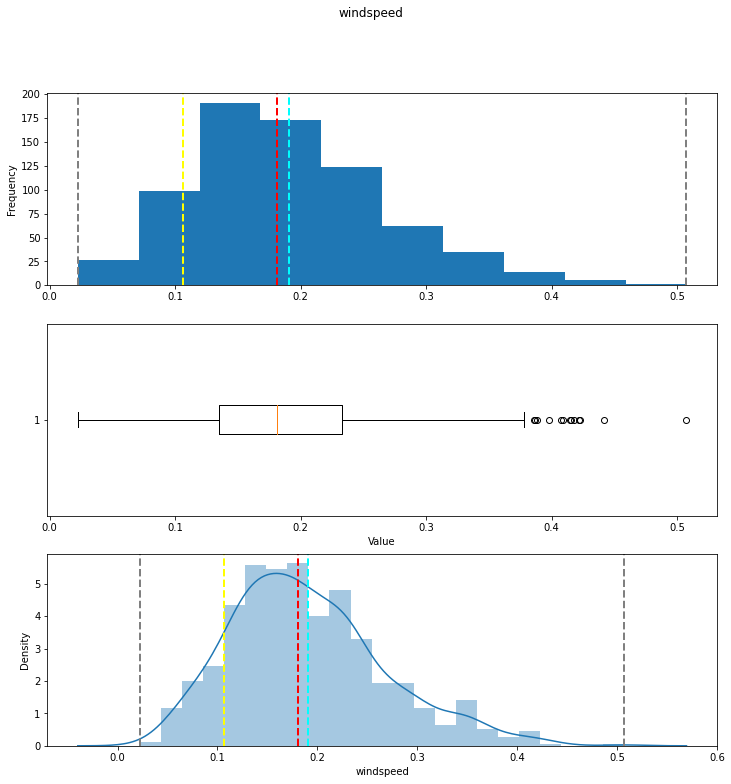

################################################################################################################


In [8]:
for i in numeric_features:
    plot_distribution(df[i])
    print("################################################################################################################")

Field name : rentals

    Minimum Value : 2 
    Maximum Value : 3410
    Median        : 713.0
    Mode Value    : 120
    Mean Value    : 848.1764705882352
    


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


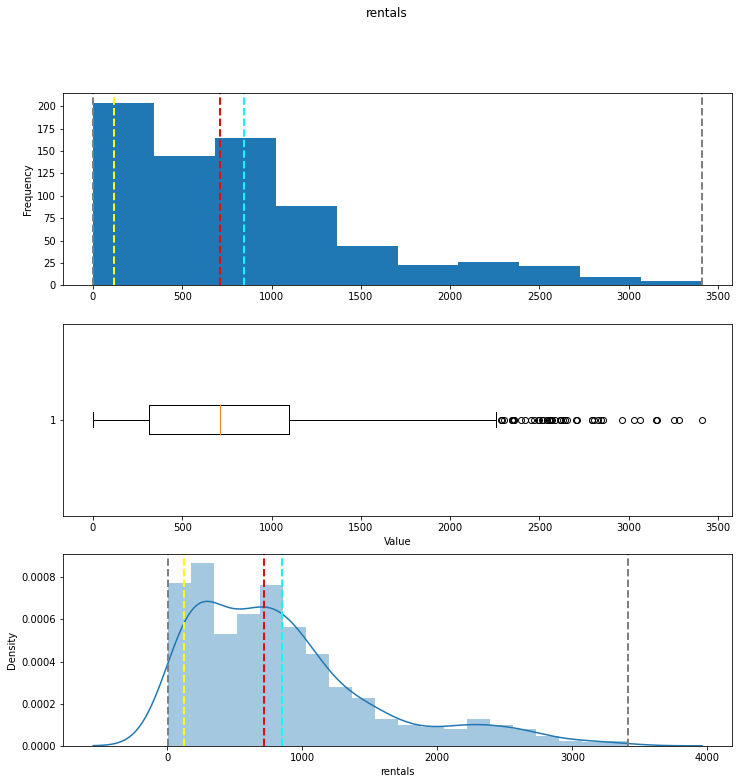

In [9]:
plot_distribution(df['rentals'])

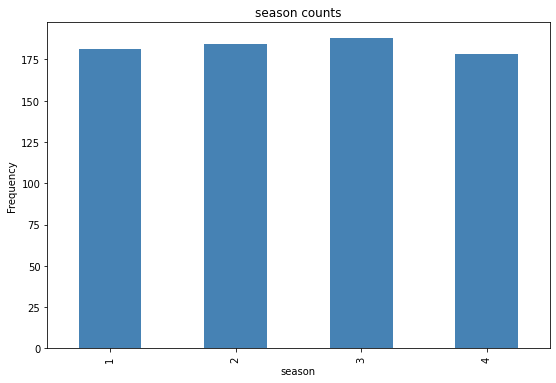

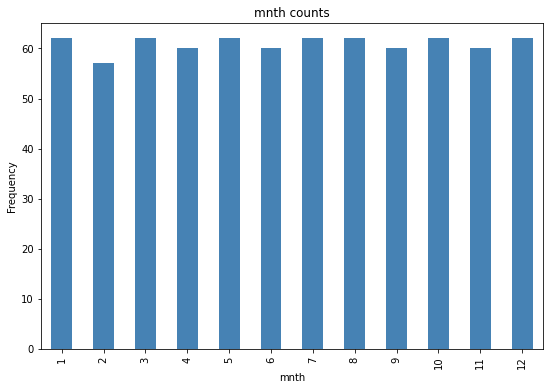

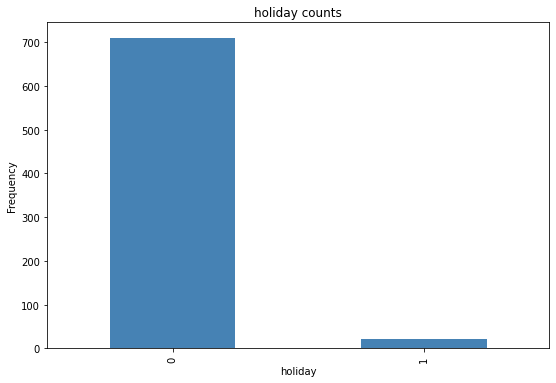

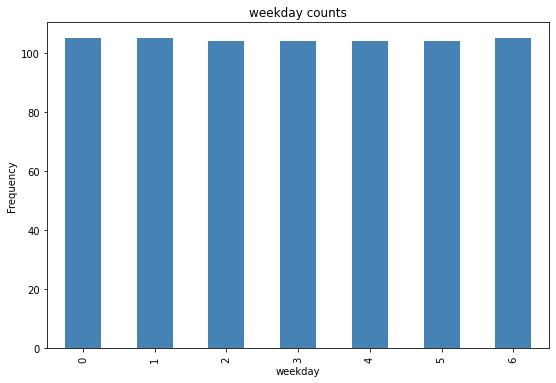

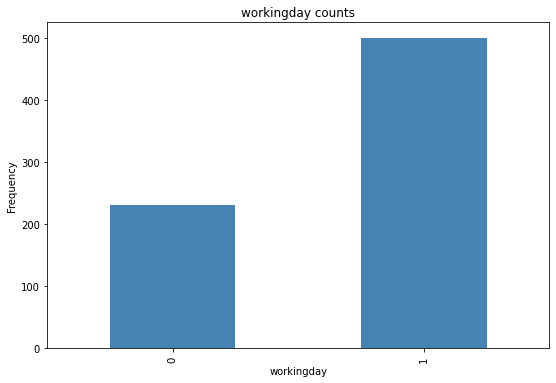

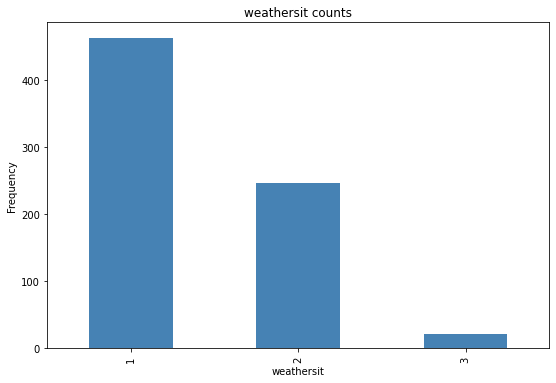

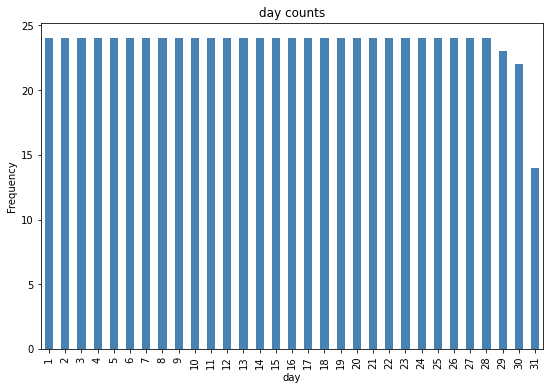

In [13]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [10]:
for i in numeric_features:
    print("Rental vs ",i,df['rentals'].corr(df[i]))

Rental vs  temp 0.5432846616821877
Rental vs  atemp 0.5438636902622048
Rental vs  hum -0.07700788276309
Rental vs  windspeed -0.16761334930380686


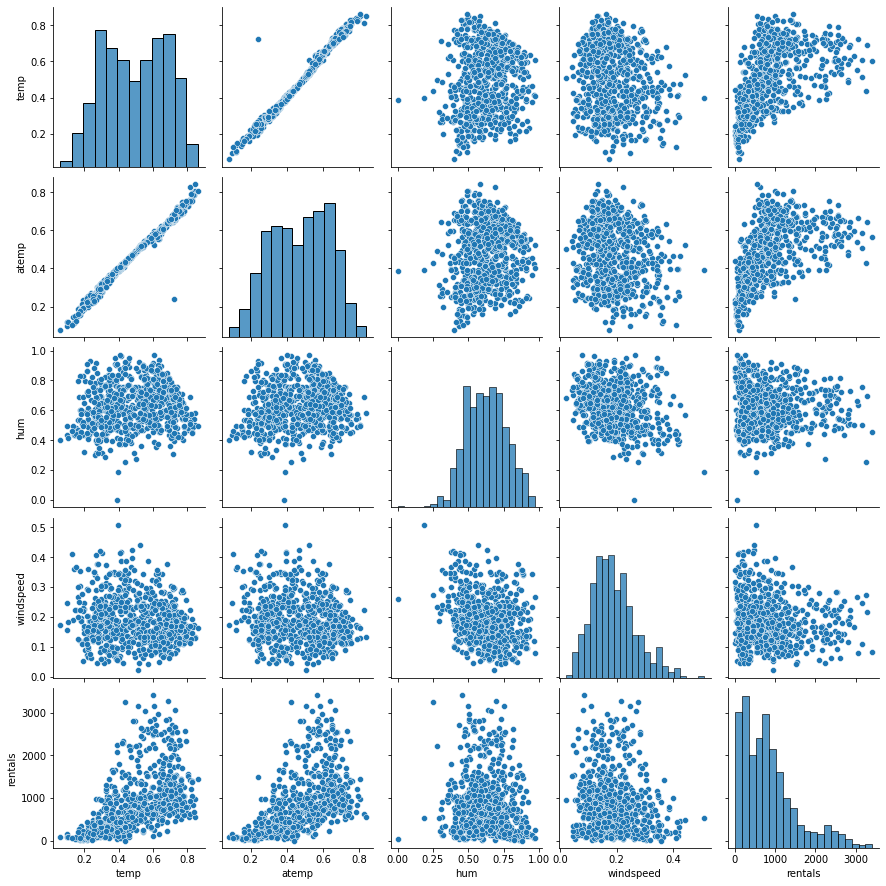

In [22]:
sns.pairplot(df[numeric_features + ["rentals"]])

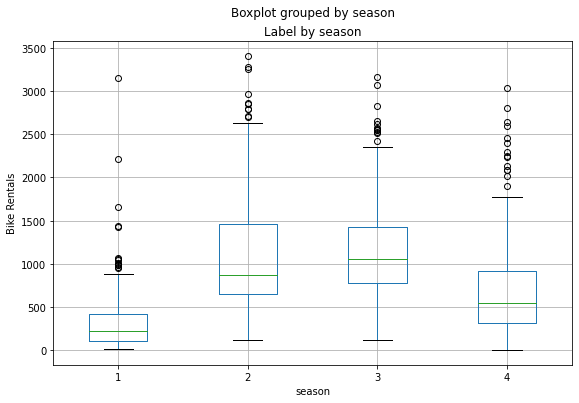

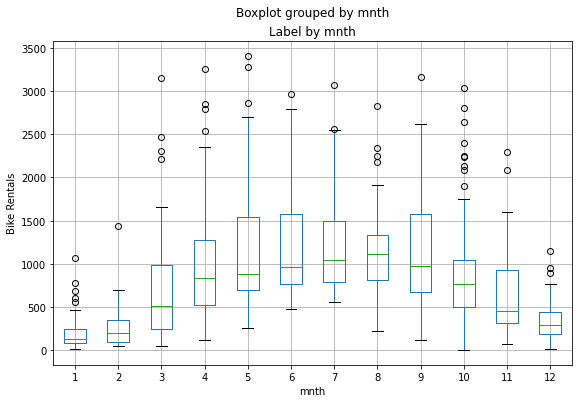

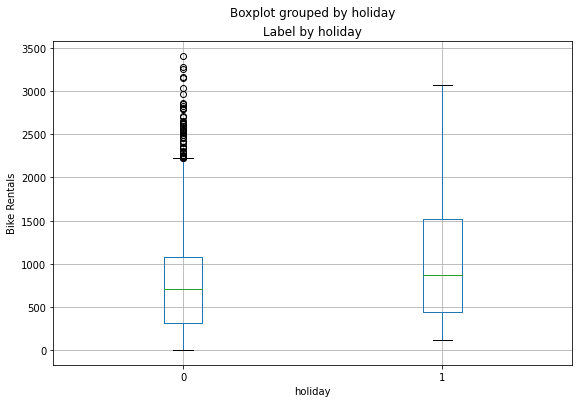

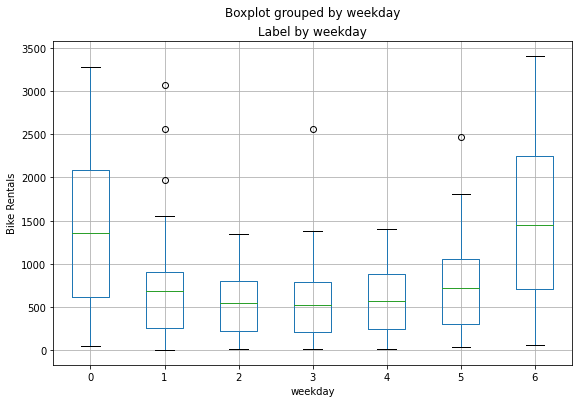

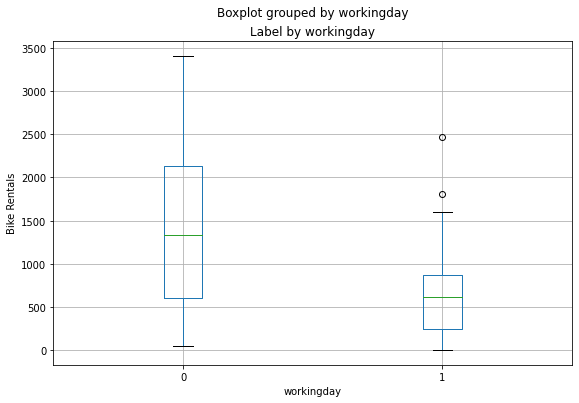

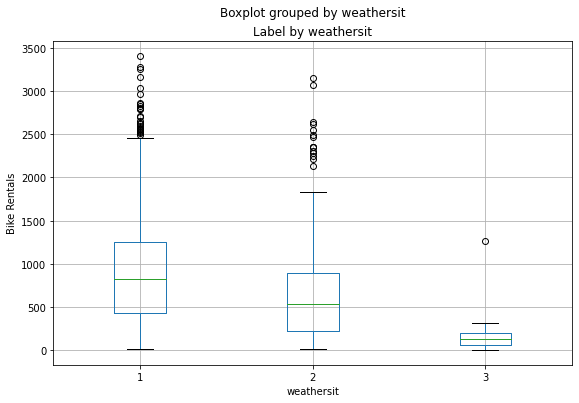

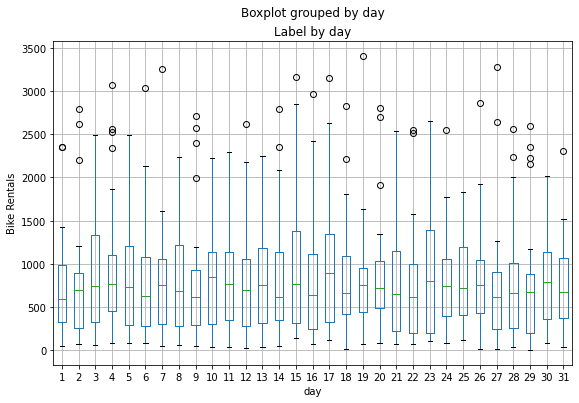

In [23]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

observations:
- season 2 and 3 rentals are high
- some months have higher rentals
- weekend rentals > week day rentals
- working day rentals < non working day rentals
- day feature I created is no use.. no significant variation in rentals( waste of energy.. sigh )

## Training a model now

In [26]:
X = df[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y = df['rentals'].values.reshape(-1,1)

X.shape, y.shape

((731, 10), (731, 1))

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression().fit(X_train,y_train)
print(model_linear_regression)

LinearRegression()


#### Eval model

In [31]:
y_pred_linear_regression = model_linear_regression.predict(X_test)

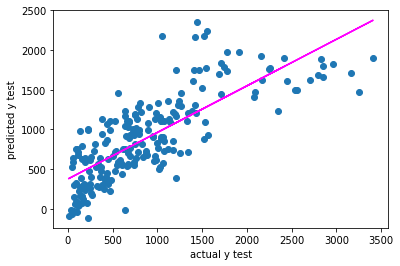

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_linear_regression)

z = np.polyfit(y_test[:,0], y_pred_linear_regression[:,0], 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()

#### Methods to evaluate Regression models
`Mean Square Error (MSE)`: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model

`Root Mean Square Error (RMSE)`: The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)

`Coefficient of Determination (usually known as R-squared or R2)`: A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_linear_regression))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_linear_regression)))
print("R2 score :",r2_score(y_test,y_pred_linear_regression))

Mean squared error : 201972.55947035606
Root mean squared error : 449.41357285951665
R2 score : 0.6040454736919187


- not happy with the results

Ridge()


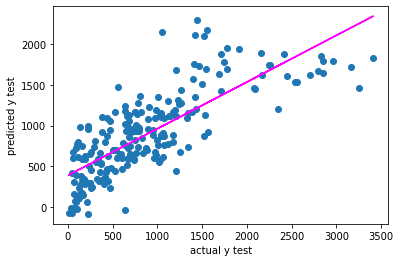

Mean squared error : 198661.35205170486
Root mean squared error : 445.714428812558
R2 score : 0.6105368880127453


In [66]:
from sklearn.linear_model import Ridge

model_ridge_regression = Ridge(1.0).fit(X_train,y_train)
print(model_ridge_regression)

y_pred_ridge_regression = model_ridge_regression.predict(X_test)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_ridge_regression)

z = np.polyfit(y_test[:,0], y_pred_ridge_regression[:,0], 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_ridge_regression))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_ridge_regression)))
print("R2 score :",r2_score(y_test,y_pred_ridge_regression))

- not gonna do.. lets try lasso

Lasso()


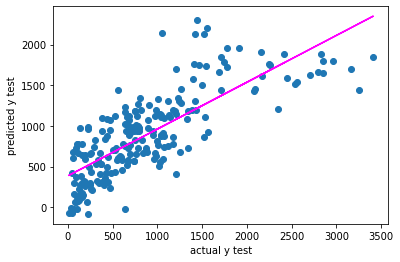

Mean squared error : 201155.70593338404
Root mean squared error : 448.5038527519959
R2 score : 0.6056468637824488


In [67]:
from sklearn.linear_model import Lasso

model_lasso_regression = Lasso().fit(X_train,y_train)
print(model_lasso_regression)

y_pred_lasso_regression = model_lasso_regression.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_lasso_regression)

z = np.polyfit(y_test[:,0], y_pred_lasso_regression, 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_lasso_regression))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_lasso_regression)))
print("R2 score :",r2_score(y_test,y_pred_lasso_regression))

- No good results

### Decision Tree Regression

DecisionTreeRegressor()


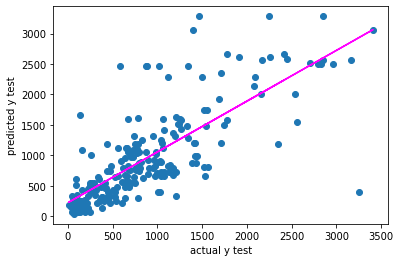

Mean squared error : 250912.17272727273
Root mean squared error : 500.9113421826988
R2 score : 0.5081024335301325


In [69]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree = DecisionTreeRegressor().fit(X_train,y_train)
print(model_decision_tree)

y_pred_decision_tree = model_decision_tree.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_decision_tree)

z = np.polyfit(y_test[:,0], y_pred_decision_tree, 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_decision_tree))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_decision_tree)))
print("R2 score :",r2_score(y_test,y_pred_decision_tree))

- worse than linear models 

### Random Forest Regression (Ensemble Method)

<ipython-input-73-b511fe0847b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)


RandomForestRegressor()


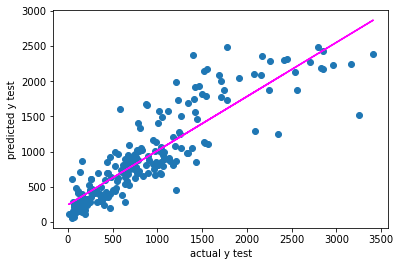

Mean squared error : 117928.71703727273
Root mean squared error : 343.407508708346
R2 score : 0.7688081518842835


In [73]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
print(model_random_forest)

y_pred_random_forest = model_random_forest.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_random_forest)

z = np.polyfit(y_test[:,0], y_pred_random_forest, 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_random_forest))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_random_forest)))
print("R2 score :",r2_score(y_test,y_pred_random_forest))

- This is okay , But trying Gradient Boosting 

c:\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor()


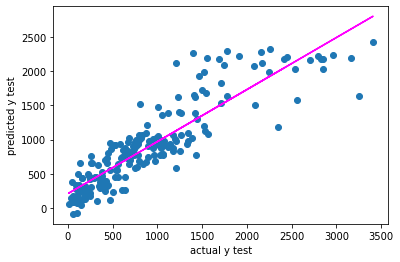

Mean squared error : 103908.98395131082
Root mean squared error : 322.3491646511757
R2 score : 0.7962929586697941


In [74]:
from sklearn.ensemble import GradientBoostingRegressor

model_grad_boosting = GradientBoostingRegressor().fit(X_train,y_train)
print(model_grad_boosting)

y_pred_grad_boosting = model_grad_boosting.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlabel= "actual y test",
    ylabel= "predicted y test"
)

ax.scatter(y_test,y_pred_grad_boosting)

z = np.polyfit(y_test[:,0], y_pred_grad_boosting, 1)
p = np.poly1d(z)
ax.plot(y_test,p(y_test), color='magenta')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error :",mean_squared_error(y_test,y_pred_grad_boosting))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,y_pred_grad_boosting)))
print("R2 score :",r2_score(y_test,y_pred_grad_boosting))